## Regendaten Sommer 2018

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

1. Daten laden in df_original

In [4]:
df_original = pd.read_csv("Regendaten_Watson_0418_1018.csv", sep=";")

In [5]:
df_original.head(10)

,abbr,time,rre150h0
0,SMA,201804010000,0.0
1,SMA,201804010100,0.0
2,SMA,201804010200,0.0
3,SMA,201804010300,0.0
4,SMA,201804010400,0.0
5,SMA,201804010500,0.0
6,SMA,201804010600,0.0
7,SMA,201804010700,0.4
8,SMA,201804010800,0.0
9,SMA,201804010900,0.0


In [6]:
df_original.dtypes

abbr         object
time          int64
rre150h0    float64
dtype: object

2. Time aufsplitten in separate Spalten

In [7]:
from datetime import datetime  

In [8]:
df_original['date'] = pd.to_datetime(df_original['time'], format='%Y%m%d%H%M')

In [9]:
df_original['year'] = df_original['date'].dt.year
df_original['month'] = df_original['date'].dt.month
df_original['day'] = df_original['date'].dt.day
df_original['hour'] = df_original['date'].dt.hour
df_original['minute'] = df_original['date'].dt.minute

3. Plotten

In [10]:
df_original['rre150h0'].describe()

count    36864.000000
mean         0.091029
std          0.777226
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         46.900000
Name: rre150h0, dtype: float64

In [11]:
df_zuerich = df_original[df_original['abbr'] == "SMA"]

In [13]:
df_zuerich.groupby(["month", "day"])["rre150h0"].max()

month  day
4      1      0.6
       2      0.0
       3      0.0
       4      1.5
       5      0.1
       6      0.0
       7      0.0
       8      0.0
       9      0.0
       10     0.0
       11     0.0
       12     0.0
       13     0.1
       14     0.0
       15     0.0
       16     1.2
       17     0.0
       18     0.0
       19     0.0
       20     0.0
       21     0.0
       22     0.0
       23     0.8
       24     0.0
       25     0.0
       26     0.0
       27     0.0
       28     0.0
       29     0.0
       30     0.8
             ... 
9      10     0.0
       11     0.0
       12     0.2
       13     7.4
       14     0.0
       15     0.0
       16     0.0
       17     0.0
       18     0.1
       19     0.0
       20     0.0
       21     0.4
       22     0.5
       23     5.4
       24     0.0
       25     0.0
       26     0.0
       27     0.0
       28     0.0
       29     0.0
       30     8.2
10     1      2.3
       2      0.0
       3      0.0

In [ ]:
to csv

In [12]:
df_zuerich[df_zuerich['month']==4].groupby("day")["rre150h0"].max()

day
1     0.6
2     0.0
3     0.0
4     1.5
5     0.1
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.1
14    0.0
15    0.0
16    1.2
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.8
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.8
Name: rre150h0, dtype: float64

In [115]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import calmap


In [116]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

/Users/leasenn/.virtualenvs/erstesVE/lib/python3.7/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)


AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

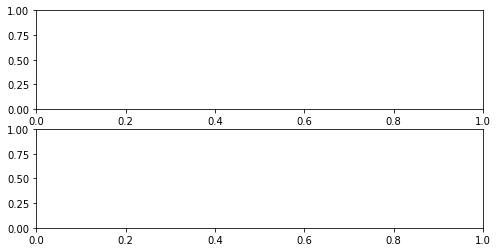

In [118]:
calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))